# Linear regression
Linear regression is a method for modeling a relationship between a dependent variable and independent variables.
These models can be fit with numerous approaches. The most common is least squares, where we can minimize squares error between the predicted values and actual values.

## Implementation using scikit-learn

### 1) Imports

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

### 2) Data pre-processing

In [62]:
diabetes = datasets.load_diabetes()
print(diabetes.data)
print(diabetes.DESCR)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure 

In [63]:
X = diabetes.data
Y = diabetes.target

In [64]:
print(X.shape)
print(Y.shape)

(442, 10)
(442,)


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [66]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(309, 10)
(309,)
(133, 10)
(133,)


### 3) Making model

In [67]:
model = linear_model.LinearRegression()

In [68]:
model.fit(X_train, y_train)

LinearRegression()

### 4) Printing weights and bias

In [69]:
print("Weights: ", model.coef_)

Weights:  [  -3.31745023 -292.71647671  578.23880364  296.30127707 -644.19786862
  353.13937522   44.99529833  243.78790024  601.25413593   18.34803897]


In [70]:
print("Intercept: ", model.intercept_)

Intercept:  151.32434563677037


### 5) Predicted values

In [71]:
y_pred = model.predict(X_test)

In [72]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [155.80752665 257.76800952 181.26587766 235.28716783 186.2631785
 178.44524097 156.25111012  76.68309777 142.68669087 243.10780164
 142.08607616 244.29460089 117.49334951 160.61640084 218.10948851
 196.31576908  76.70389832 120.91232064 188.56700536 142.64894143
 194.20630992  53.3471589  239.64607368 155.39635817 210.57988544
 152.50448571 126.5095082  171.37978001 192.36754757 142.58692826
 175.47205539 189.43503657 226.57622155 170.75624442 183.87107864
 176.8592079  236.5099668   59.43526514 119.34135139 122.38842806
 157.46769364 224.09884926 140.03429901  73.10874942 122.25306307
  72.34331675 125.7293288  232.75481697 196.89187768 198.50655843
 147.56633525 180.71389258 143.20373573  79.44139553 138.71237174
 157.32420482 180.03273872  69.45051092 176.6875853  115.14547737
 184.10133614 122.19583357 260.35708599 130.59527928 194.95103035
 141.86040082  79.65640867 225.06528415 163.10478545 182.80172387
 233.48885368  73.57659184 191.29082006 186.45890093

### 6) Actual value and the predicted value

In [73]:
df = pd.DataFrame({'Actual_value': y_test, 'Predicted_value': y_pred})
df.head()

,Actual_value,Predicted_value
0,142.0,155.807527
1,303.0,257.768010
2,84.0,181.265878
3,280.0,235.287168
4,48.0,186.263178


In [74]:
y_test.shape

(133,)

In [75]:
y_pred.shape

(133,)

### 7) Model Evaluation

In [76]:
from sklearn import metrics

In [77]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 48.3254550620505
Mean Square Error: 3564.677144322974
Root Mean Square Error: 59.70491725413388


## Another dataset

In [78]:
df = pd.read_csv("advertising.csv")

In [79]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [80]:
df.drop(columns=["Radio", "Newspaper"], inplace=True)

In [81]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [82]:
x = df[['TV']]
y = df['Sales']

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [84]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [85]:
model.fit(x_train, y_train)

LinearRegression()

In [86]:
y_pred = model.predict(x_test)

In [87]:
print(y_pred)

[ 7.37414007 19.94148154 14.32326899 18.82329361 20.13239168 18.2287449
 14.54145201 17.72692398 18.75238413 18.77420243 13.34144544 19.46693349
 10.01415451 17.1923756  11.70507285 12.08689312 15.11418241 16.23237035
 15.8669138  13.1068987  18.65965635 14.00690363 17.60692332 16.60328147
 17.03419291 18.96511257 18.93783969 11.05597839 17.03419291 13.66326538
 10.6796127  10.71234015 13.5487193  17.22510305  9.67597085 13.52144643
 12.25053038 16.13418799 19.07965865 17.48692266 18.69783838 16.53237199
 15.92145955 18.86693021 13.5050827  11.84143724  7.87050642 20.51966653
 10.79961336  9.03233096 17.99419817 16.29237067 11.04506924 14.09963141
 18.44147334  9.3759692   7.88687015  8.34505447 17.72692398 11.62325422]


In [88]:
df2 = pd.DataFrame({'Actual_value': y_test, 'Predicted_value': y_pred})
df2.head()

,Actual_value,Predicted_value
126,6.6,7.374140
104,20.7,19.941482
99,17.2,14.323269
92,19.4,18.823294
111,21.8,20.132392


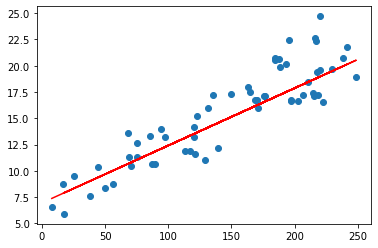

In [91]:
## Line of best fit
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, "Red")

In [93]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(model.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 81.10
Mean Absolute Error: 1.6480589869746525
Mean Square Error: 4.077556371826948
Root Mean Square Error: 2.019296008966231
